# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


<h1> Github Link: </h1>

<b> https://github.com/RobFaj/deep_learning/edit/main/HW2_The_Perceptron-1.ipynb

In [ ]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2022-01-27 22:57:42--  http://www.cse.unt.edu/~blanco/csce5218/hw1a/train.dat
Resolving www.cse.unt.edu (www.cse.unt.edu)... 129.120.151.91
Connecting to www.cse.unt.edu (www.cse.unt.edu)|129.120.151.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K) [application/x-ns-proxy-autoconfig]
Saving to: ‘train.dat’

train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2022-01-27 22:57:42 (235 MB/s) - ‘train.dat’ saved [11244/11244]

--2022-01-27 22:57:43--  http://www.cse.unt.edu/~blanco/csce5218/hw1a/test.dat
Resolving www.cse.unt.edu (www.cse.unt.edu)... 129.120.151.91
Connecting to www.cse.unt.edu (www.cse.unt.edu)|129.120.151.91|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K) [application/x-ns-proxy-autoconfig]
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2022-01-27 22:57:43 (337 MB/s) - ‘test.dat’ saved [2844/2844]



In [1]:
# Get the datasets
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 63 11244   63  7093    0     0  40459      0 --:--:-- --:--:-- --:--:-- 40531
100 11244  100 11244    0     0  63911      0 --:--:-- --:--:-- --:--:-- 63886
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0    99k      0 --:--:-- --:--:-- --:--:--  102k


In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

In [5]:
# Take a peek at the datasets
#!head train.dat
#!head test.dat
print("Train data")
with open('train.dat') as f:
    for _ in range(5): 
        print(f.readline())
print("Test data")
with open('test.dat') as f:
    for _ in range(5): 
        print( f.readline())


Train data
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	

1	1	0	0	0	0	0	0	1	1	0	0	1	0

0	0	1	1	0	1	1	0	0	0	0	0	1	0

0	1	0	1	1	0	1	0	1	1	1	0	1	1

0	0	1	0	0	1	0	1	0	1	1	1	1	0

Test data
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13

1	1	1	1	0	0	1	1	0	0	0	1	1	0

0	0	0	1	0	0	1	1	0	1	0	0	1	0

0	1	1	1	0	1	1	1	1	0	0	0	1	0

0	1	1	0	1	0	1	1	1	0	1	0	1	0



### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [14]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum([w * x for w, x in zip(array1, array2)])


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    #sigmoid(x) = 1/(1+e-x)
    
    return 1 / (1 + math.exp(-x))



# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return NotImplemented

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    if sigmoid(dot_product(weights, instance)) >= 0.5:
        return 1
    return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step.   This step calculates the weight applied the input value 
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)  #The perceptron collects the dot product of weight vector and input feature
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [15]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [43]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

instance_perc =[]
lr_list=[]
epoch_list=[]
acc = []

for tr_size in tr_percent:
    for lr in lr_array:
        for epochs in [5, 10, 20, 50, 100]:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            instance_perc.append(len(instances_te))
            epoch_list.append((epochs))
            lr_list.append((lr))
            acc.append((accuracy))
        print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")




#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 64.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 300, epochs: 100,

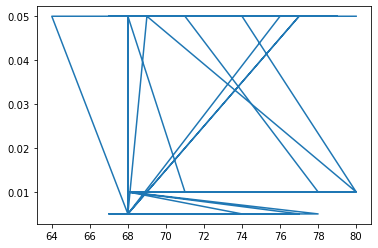

In [49]:
#I modified the loop to go through all learning rates and epochs.  Moved size and pre-instances to out loop.
#tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with

a, x = np.split(instances_tr, [int(.05*len(instances_tr))])
b, x = np.split(instances_tr, [int(.10*len(instances_tr))])
c, x = np.split(instances_tr, [int(.25*len(instances_tr))])
d, x = np.split(instances_tr, [int(.50*len(instances_tr))])
e, x = np.split(instances_tr, [int(.75*len(instances_tr))])
f= instances_tr

instance_perc =[]
lr_list=[]
epoch_list=[]
acc = []

tr_percent = [a,b,c,d,e,f]

for tr_percent1 in tr_percent:
    tr_percent2=tr_percent1
    for lr1 in [0.005, 0.01, 0.05]:
        lr= lr1
        for num_epochs in [5, 10, 20, 50, 100]:
            epochs = num_epochs

    #        for tr_percent in [] 
            weights = train_perceptron(tr_percent2, lr, epochs) #make this a for loop
            accuracy = get_accuracy(weights, instances_te)
            instance_perc.append(len(instances_te))
            epoch_list.append((epochs))
            lr_list.append((lr))
            acc.append((accuracy))
            print(f"#tr: {len(tr_percent2):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
              f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs

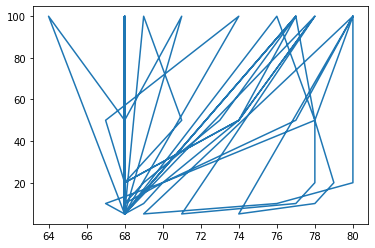

In [51]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(epoch_list)
x= np.array(acc)
plt.plot(x, y)
plt.show()

# at 20 epochs the accuracy rate is more often at 68 and the range is smaller but it's highest is 80.  At 100 epochs the accuracy ranges from 64 to 80.  

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



In [42]:
tr_percent = [f,f,f,f,f]
#tr_percent = [c,d]
for tr_percent1 in tr_percent:
    tr_percent2=tr_percent1
    for lr1 in [0.01]:
        lr= lr1
        for num_epochs in [70000]:
            epochs = num_epochs

    #        for tr_percent in [] 
            weights = train_perceptron(tr_percent2, lr, epochs) #make this a for loop
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(tr_percent2):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
              f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs: 70000, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 70000, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 70000, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 70000, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 70000, learning rate: 0.010; Accuracy (test, 100 instances): 80.0


In [48]:
tr_percent = [f,f,f,f,f]
#tr_percent = [c,d]
for tr_percent1 in tr_percent:
    tr_percent2=tr_percent1
    for lr1 in [0.01, 0.005]:
        lr= lr1
        for num_epochs in [2000, 1000, 100]:
            epochs = num_epochs

    #        for tr_percent in [] 
            weights = train_perceptron(tr_percent2, lr, epochs) #make this a for loop
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(tr_percent2):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
              f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs: 2000, learning rate: 0.010; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 1000, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 2000, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 1000, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 2000, learning rate: 0.010; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 1000, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 2000, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 1000, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 400

<h3><b> A. I have exhausted all parameters and tried to adjust the number of epochs from 100 to 10,000.  Overall, I noticed that when I train with the entire dataset my numbers are much closer to 80.  I can train with a lower percentage of the dataset, but the score is very low.   
    <p><p>
        B. The second result is lower because you need more epochs with that learning rate to get a high accuracy.
    <p><p>
    C. I could not get a higher accuracy than 80.  Even at 70,000 epochs.  I may need to try 100,000. 
    <p> <p>
    D. For this small size of data set, we may need to consider a different model and more hidden layers and possibly a bypass input layer.  For our alrogithm, it is ideal, to get a larger dataset to begin tweaking the parameters for higher accuracy scores above 80%.    